## Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data

In [2]:
data = pd.read_csv('Health_Sleep_Statistics.csv')

In [3]:
data.head(3)

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no


## Missing Values?

In [4]:
data.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

## Duplicated Values?

In [6]:
data.duplicated().sum()

0

## Numerical Columns

In [7]:
# Numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['User ID', 'Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']


In [8]:
data[numerical_cols].corr(method='kendall')

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
User ID,1.000000,0.049626,-0.007582,-0.037998,-0.016419
Age,0.049626,1.000000,-0.695424,-0.677696,-0.674462
Sleep Quality,-0.007582,-0.695424,1.000000,0.929860,0.939450
Daily Steps,-0.037998,-0.677696,0.929860,1.000000,0.931894
Calories Burned,-0.016419,-0.674462,0.939450,0.931894,1.000000


## Categorical Columns

In [9]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Gender', 'Bedtime', 'Wake-up Time', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']


In [10]:
data.head(3)

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no


## Distribution of Numerical Columns

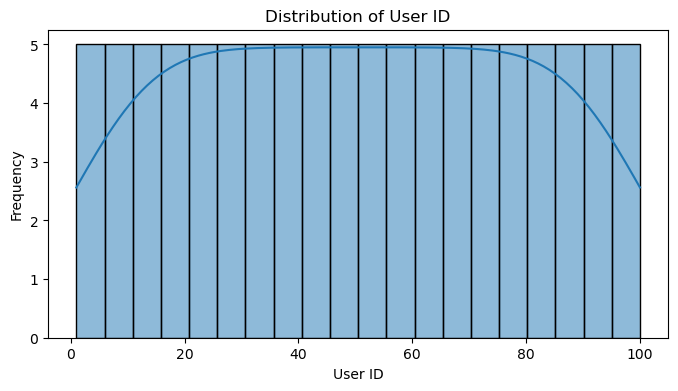

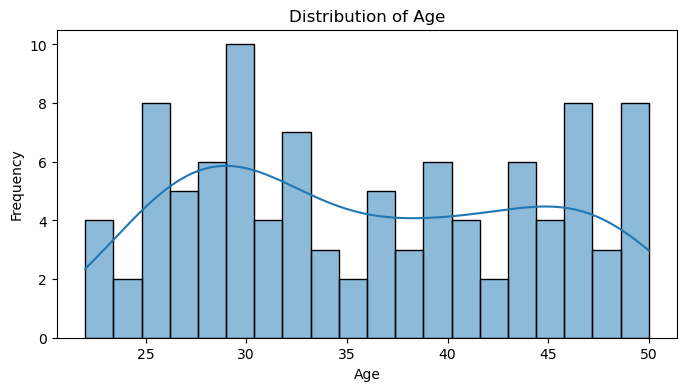

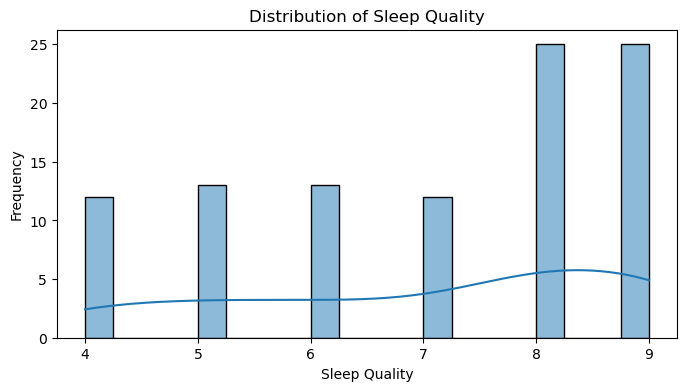

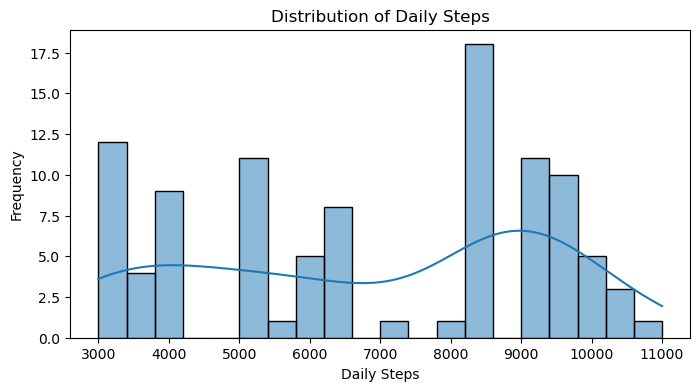

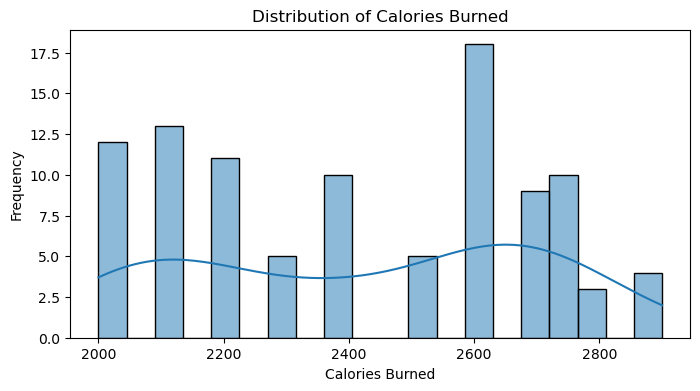

In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Distribution of Categorical Columns

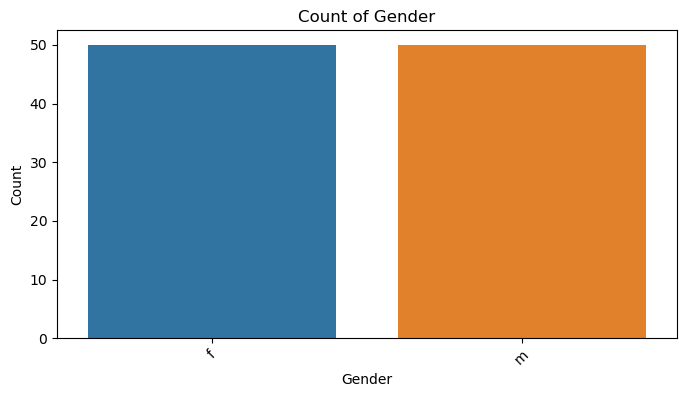

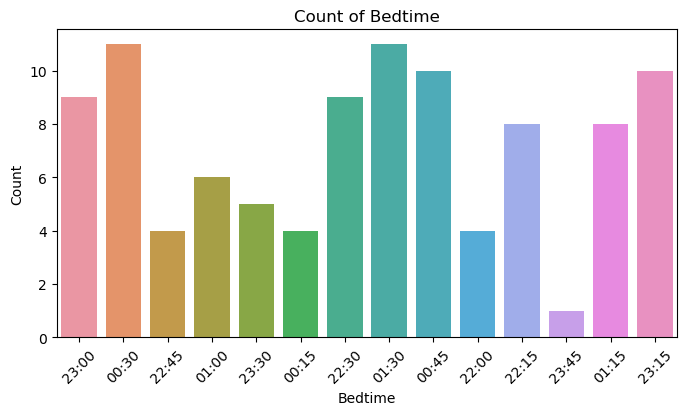

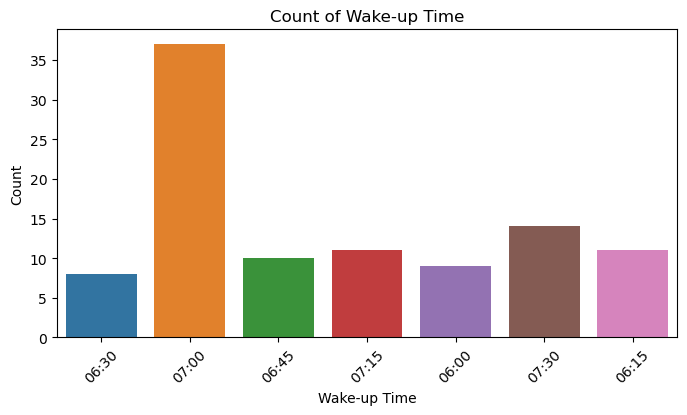

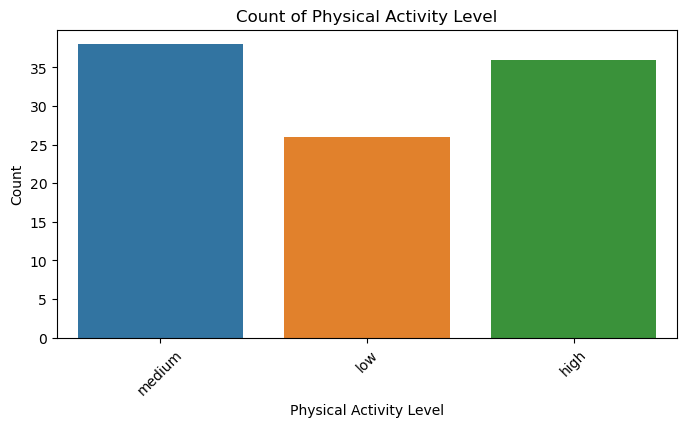

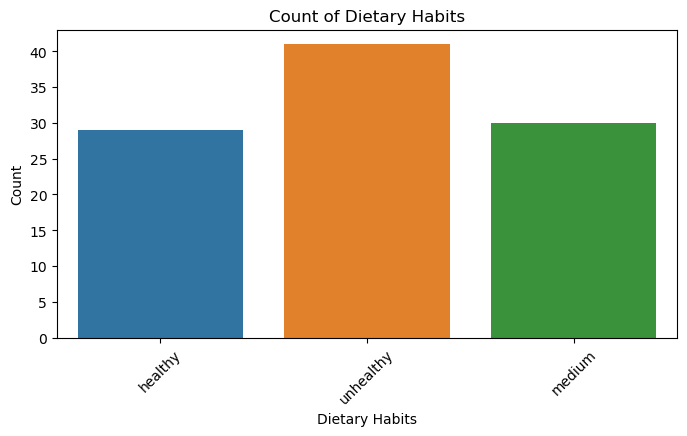

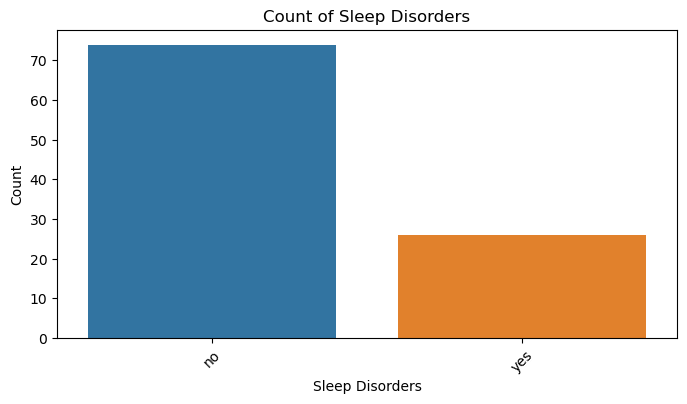

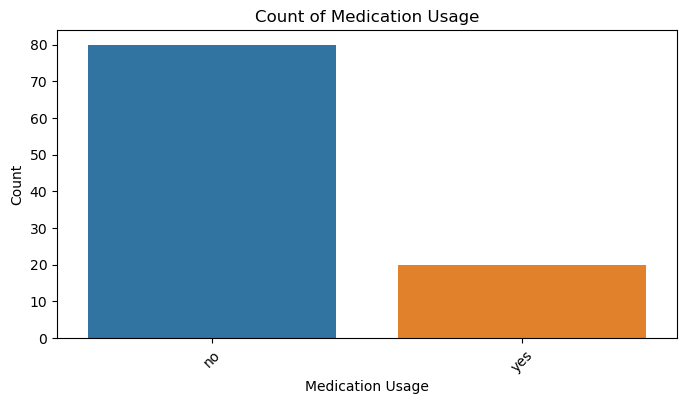

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Sleep Quality, Daily Steps, Calories Burned grouped by Gender

In [13]:
grouped_df = data.groupby('Gender')[['Sleep Quality', 'Daily Steps', 'Calories Burned']].mean()
print(grouped_df)

        Sleep Quality  Daily Steps  Calories Burned
Gender                                             
f                8.42       8940.0           2654.0
m                5.58       4720.0           2188.0


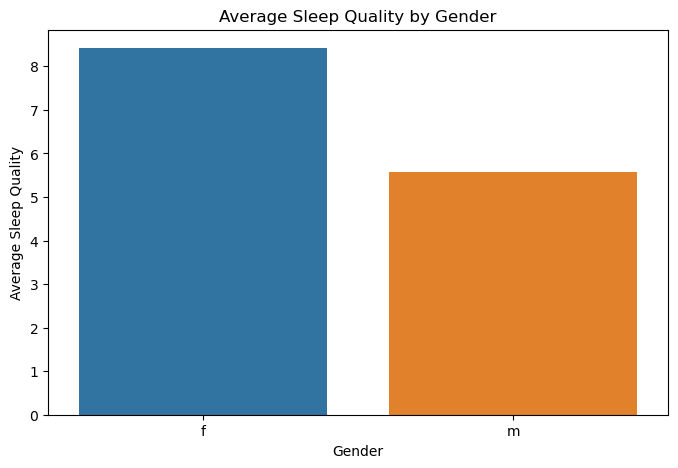

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_df.index, y='Sleep Quality', data=grouped_df)
plt.title('Average Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=0)
plt.show()

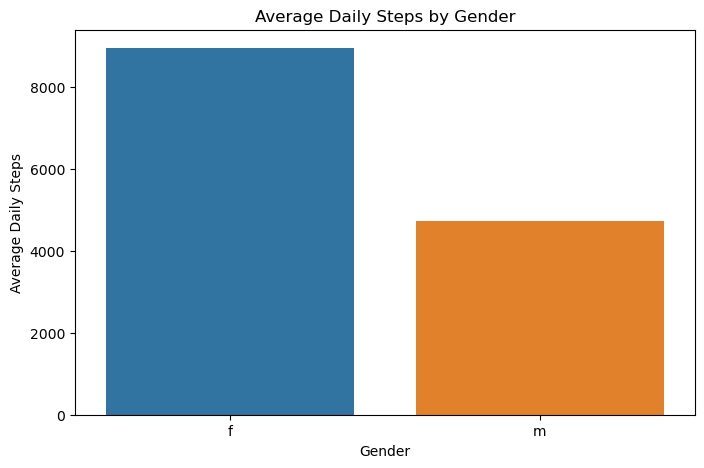

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_df.index, y='Daily Steps', data=grouped_df)
plt.title('Average Daily Steps by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Steps')
plt.xticks(rotation=0)
plt.show()

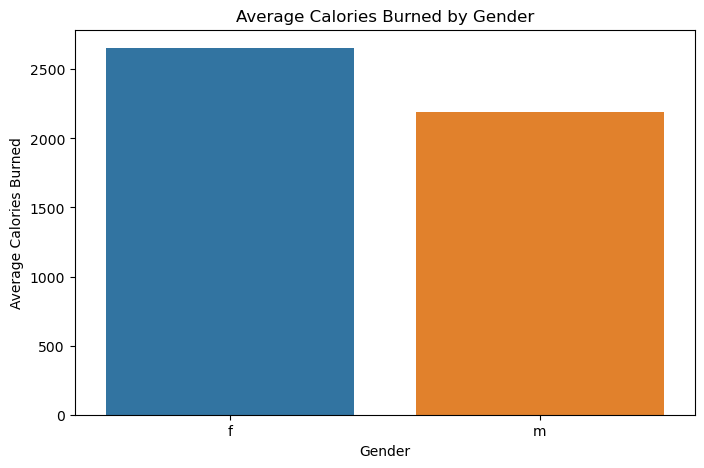

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_df.index, y='Calories Burned', data=grouped_df)
plt.title('Average Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=0)
plt.show()

## Sleep Disorders Vs. Sleep Quality

<Figure size 800x600 with 0 Axes>

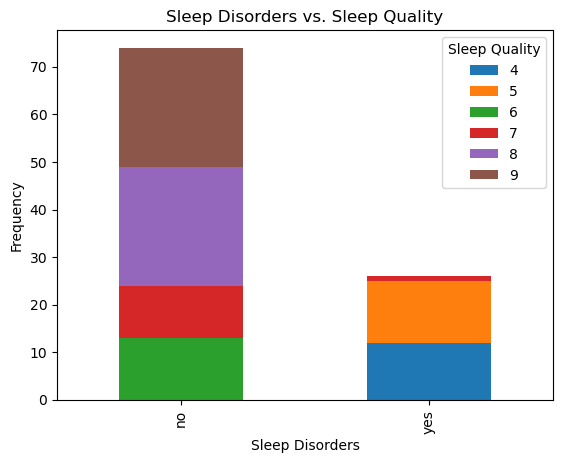

In [18]:
plt.figure(figsize=(8, 6))
pd.crosstab(data['Sleep Disorders'], data['Sleep Quality']).plot(kind='bar', stacked=True)
plt.title('Sleep Disorders vs. Sleep Quality')
plt.xlabel('Sleep Disorders')
plt.ylabel('Frequency')
plt.show()

## Daily steps Vs. Sleep Quality

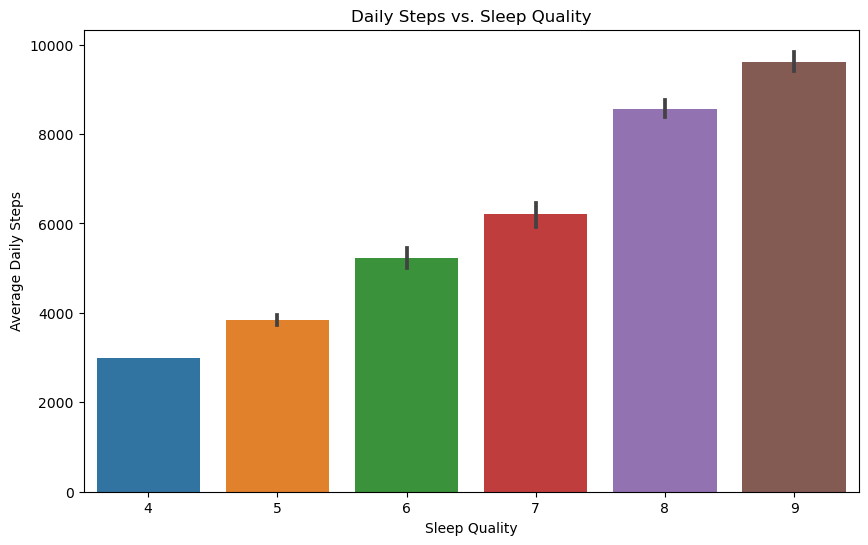

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Quality', y='Daily Steps', data=data)
plt.title('Daily Steps vs. Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Average Daily Steps')
plt.show()

## Categorical values to Numerical

In [20]:
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

## Correlation Matrix

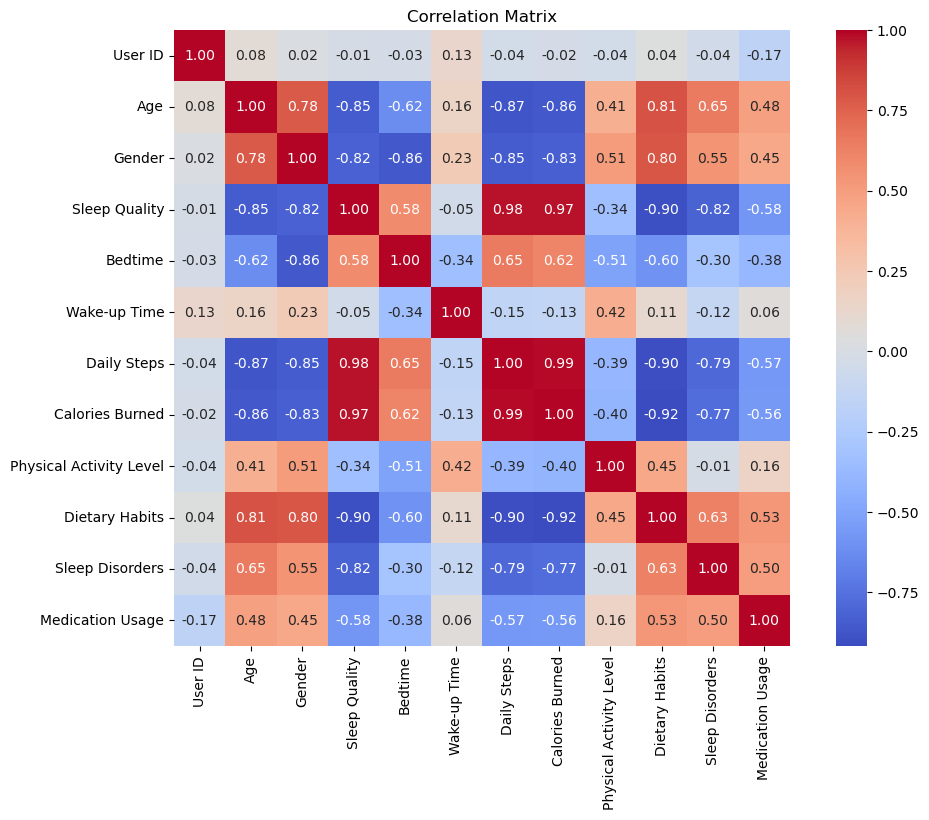

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()